
# Data Loading and Preprocessing in PyTorch for Image Classification

This notebook covers:
1. Understanding how datasets are loaded in PyTorch
2. Applying image transformations and augmentations
3. Understanding pointwise vs pixel-level transformations
4. Handling datasets in different formats (folders, CSV, custom datasets)
5. Exploring data dimensions and their effects on training
6. Visualizing transformations and dataset properties


In [1]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models, datasets
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import pandas as pd

In [2]:
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu



## 1. Understanding Image Transformations
Transformations in `torchvision.transforms` allow us to preprocess images before feeding them into a model. 
They can be categorized as:
- **Pointwise transformations** (apply independently to each pixel, e.g., normalization, color jitter)
- **Pixel-level transformations** (consider spatial relationships, e.g., rotations, flips)


In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match pretrained model input
    transforms.RandomHorizontalFlip(),  # Pixel-level transformation
    transforms.RandomRotation(15),  # Pixel-level transformation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Pointwise transformation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pointwise transformation
])


## 2. Loading Dataset from `torchvision`

We use the `CIFAR-10` dataset, a commonly used dataset in vision tasks. The CIFAR-10 dataset is a popular collection of images used for training machine learning models, particularly in the field of computer vision. It contains 60,000 32x32 pixel color images divided into 10 classes, with 6,000 images per class. These classes represent a variety of everyday objects, such as animals and vehicles. The dataset is typically used for classification tasks, where the goal is to correctly label each image based on the object it contains.

In [4]:
# Load dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# Define class labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [06:35<00:00, 431630.94it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## 3. Handling Different Dataset Formats
Apart from `torchvision` datasets, real-world datasets may come in:
- **Folder structure** (images inside labeled subdirectories)
- **CSV files** (file paths with labels stored in a CSV file)
- **Custom datasets** (image files with unknown format)


### 3.1 Loading Images from Folder Structure


In [5]:
# image_dataset = datasets.ImageFolder(root='./custom_data', transform=transform)
# image_loader = DataLoader(image_dataset, batch_size=32, shuffle=True)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './custom_data'

### 3.2 Loading Images from a CSV File

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = self.data.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

csv_dataset = CustomDataset(csv_file='./data/labels.csv', root_dir='./data/images', transform=transform)
csv_loader = DataLoader(csv_dataset, batch_size=32, shuffle=True)


## 4. Exploring Data Dimensions
Understanding how data dimensions affect training is crucial. 
For example, PyTorch expects image tensors in shape `(C, H, W)`, but sometimes datasets have `(H, W, C)` format.
"""


In [6]:
# Fetch a batch of images
images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}")  # Expected: (batch_size, 3, 224, 224)

Batch shape: torch.Size([32, 3, 224, 224])


## 5. Visualizing Image Transformations
Let's visualize how transformations affect images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


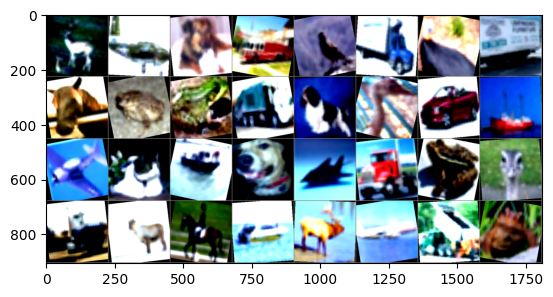

deer plane dog truck bird truck bird truck


In [7]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display a batch of images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(8)))

In [8]:
# Check the shape of a single image tensor
image, label = trainset[0]
print(f"Image shape: {image.shape}")  # Expected output: (3, 224, 224) if resized to 224x224
print(f"Label: {classes[label]}")


Image shape: torch.Size([3, 224, 224])
Label: frog


In [10]:
from collections import Counter

# Count occurrences of each class
labels_count = Counter([label for _, label in trainset])
print("Class distribution in training data:", labels_count)


Class distribution in training data: Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})



## Conclusion
- We explored different ways to load datasets in PyTorch.
- We discussed pointwise and pixel-level transformations.
- We handled different dataset formats (folders, CSV, custom loaders).
- We examined data dimensions and their effects.
- We visualized transformations to understand preprocessing better.

